#  Heart Disease


Recently, machine learning is being used to diagnose diseases at the earliest stage. This also helps the doctors to reduce the cost of health care. For this purpose, some data has been collected at [UCI machine learning data set](http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data) .

The features or attributes are

- age - age in years      
- sex - sex (1 = male; 0 = female)       
- cp: chest pain type
- trestbpss: resting blood pressure (in mm Hg on admission to the hospital)  
- chol: serum cholestoral in mg/dl      
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)       
- restecg: resting electrocardiographic results
- thalach : maximum heart rate achieved
- exang : exercise induced angina (1 = yes; 0 = no)
- oldpeak : ST depression induced by exercise relative to rest
- slope : the slope of the peak exercise ST segment
- ca : number of major vessels (0-3) colored by flourosopy
- thal : 3 = normal; 6 = fixed defect; 7 = reversable defect

The target is 
- num : diagnosis of heart disease (angiographic disease status) - values range from 0 - 4

All the above 13 attributes are used to predict the target. 



In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Creating Columns

In [2]:
heart = pd.read_csv('processed.cleveland.data',delimiter =',')
heart.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [3]:
heart.columns=['age','sex','cp','trestbpss','chol','fbs','restecg','thalach','exang' ,'oldpeak','slope','ca','thal','target']
heart.tail()

,age,sex,cp,trestbpss,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


### Checking for null values and dtypes

In [4]:
heart.isnull().sum()

age          0
sex          0
cp           0
trestbpss    0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [5]:
heart.dtypes

age          float64
sex          float64
cp           float64
trestbpss    float64
chol         float64
fbs          float64
restecg      float64
thalach      float64
exang        float64
oldpeak      float64
slope        float64
ca            object
thal          object
target         int64
dtype: object

### Cleaning Data


#### The last two columns have object dtype ---> change to NaN and then with zero

In [7]:
heart=heart.where(heart!='?',np.nan)
#heart=heart.where(heart!=np.nan,0.0)
heart.tail()

,age,sex,cp,trestbpss,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [8]:
heart.isnull().sum()

age          0
sex          0
cp           0
trestbpss    0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           4
thal         2
target       0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(heart)
imputed_data = imr.transform(heart.values)
imputed_data

array([[67.        ,  1.        ,  4.        , ...,  3.        ,
         3.        ,  2.        ],
       [67.        ,  1.        ,  4.        , ...,  2.        ,
         7.        ,  1.        ],
       [37.        ,  1.        ,  3.        , ...,  0.        ,
         3.        ,  0.        ],
       ...,
       [57.        ,  1.        ,  4.        , ...,  1.        ,
         7.        ,  3.        ],
       [57.        ,  0.        ,  2.        , ...,  1.        ,
         3.        ,  1.        ],
       [38.        ,  1.        ,  3.        , ...,  0.67449664,
         3.        ,  0.        ]])

In [10]:
type(imputed_data)

numpy.ndarray

In [11]:
df=pd.DataFrame(data=imputed_data[0:,0:])
df.columns=['age','sex','cp','trestbpss','chol','fbs','restecg','thalach','exang' ,'oldpeak','slope','ca','thal','target']
df

,age,sex,cp,trestbpss,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,2.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.000000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1.0
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,2.0
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,3.0
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1.0


In [12]:
df.isnull().sum()
df.dtypes

age          float64
sex          float64
cp           float64
trestbpss    float64
chol         float64
fbs          float64
restecg      float64
thalach      float64
exang        float64
oldpeak      float64
slope        float64
ca           float64
thal         float64
target       float64
dtype: object

### Splitting Data

In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:,13].values

In [14]:
X

array([[67.        ,  1.        ,  4.        , ...,  2.        ,
         3.        ,  3.        ],
       [67.        ,  1.        ,  4.        , ...,  2.        ,
         2.        ,  7.        ],
       [37.        ,  1.        ,  3.        , ...,  3.        ,
         0.        ,  3.        ],
       ...,
       [57.        ,  1.        ,  4.        , ...,  2.        ,
         1.        ,  7.        ],
       [57.        ,  0.        ,  2.        , ...,  2.        ,
         1.        ,  3.        ],
       [38.        ,  1.        ,  3.        , ...,  1.        ,
         0.67449664,  3.        ]])

In [15]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.75, 
                                                    random_state=123, stratify=y)

## Applying Data Models

### KNN

In [16]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(train_X, train_y)
print("Test set accuracy: {:.2f}".format(clf.score(test_X, test_y)))

Test set accuracy: 0.54


In [17]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(train_X, train_y)
y_pred = knn.predict(test_X)
print("Accuracy of test:",metrics.accuracy_score(test_y, y_pred))

Accuracy of test: 0.5789473684210527


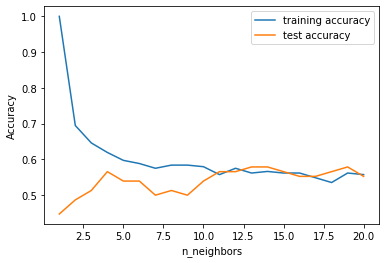

In [18]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.75, 
                                                    random_state=123, stratify=y)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 21)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(train_X, train_y)
    # record training set accuracy
    training_accuracy.append(clf.score(train_X, train_y))
    # record generalization accuracy
    test_accuracy.append(clf.score(test_X, test_y))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### best neighbor 

In [19]:
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.75, 
                                                    random_state=123, stratify=y)
k_range = list(range(1, 21))
best_score = 0
for n in k_range:
        # for each combination of parameters
        # train an knn
        knn = KNeighborsClassifier(n_neighbors= n)
        knn.fit(X_train, y_train)
        # evaluate the knn on the test set
        score = knn.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'n_neighbors': n}
knn1 = KNeighborsClassifier(n_neighbors= best_parameters['n_neighbors'])
knn1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(knn1.score(X_train, y_train)))
print("best score: ", best_score)
print("best parameters: ", best_parameters)

Accuracy on training set: 0.562
best score:  0.5789473684210527
best parameters:  {'n_neighbors': 13}


## CROSS VALIDATION 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.75, 
                                                    random_state=123, stratify=y)
print("Size of training set: %d, size of test set: %d" % (X_train.shape[0], X_test.shape[0]))
best_score = 0
for n in range(1, 20):
    for w in ['uniform', 'distance']:
        # for each combination of parameters
        # train an knn
        knn = KNeighborsClassifier(n_neighbors= n,weights=w)
        knn.fit(X_train, y_train)
        # evaluate the knn on the test set
        score = knn.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'n_neighbors': n, 'weights': w}
knn1 = KNeighborsClassifier(n_neighbors= best_parameters['n_neighbors'],weights=best_parameters['weights'])
knn1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(knn1.score(X_train, y_train)))
print("best score: ", best_score)
print("best parameters: ", best_parameters)


Size of training set: 226, size of test set: 76
Accuracy on training set: 0.562
best score:  0.5789473684210527
best parameters:  {'n_neighbors': 13, 'weights': 'uniform'}


### CROSS VALIDATION AND TUNING HYPERPARAMETER

In [21]:
X_trainval, test_X, y_trainval, test_y = train_test_split(X, y, 
                                                    train_size=0.75, 
                                                    random_state=123, stratify=y)
best_score = 0
for n in range(1, 20):
    for w in ['uniform', 'distance']:
        # for each combination of parameters
        # train an KNN
        knn = KNeighborsClassifier(n_neighbors= n,weights=w)
        # perform cross-validation
        scores = cross_val_score(knn, X_trainval, y_trainval, cv=10)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'n_neighbors': n, 'weights': w}
# rebuild a model on the combined training and validation set, and evaluate it on the test set
knn = KNeighborsClassifier(**best_parameters)
knn.fit(X_trainval, y_trainval)
test_score = knn.score(X_test, y_test)
knn1 = KNeighborsClassifier(n_neighbors= best_parameters['n_neighbors'],weights=best_parameters['weights'])
knn1.fit(X_train, y_train)
print("Accuracy on training set: {:}".format(knn1.score(X_test, y_test)))
print("best score on validation set: ", best_score)
print("best parameters: ", best_parameters)
print("test set score with best parameters: ", test_score)


Accuracy on training set: 0.5789473684210527
best score on validation set:  0.544967720685112
best parameters:  {'n_neighbors': 19, 'weights': 'uniform'}
test set score with best parameters:  0.5789473684210527


## DECISION TREE

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42,train_size=0.75)

d_range = list(range(1, 20))
best_score = 0
for n in d_range:
        tree = DecisionTreeClassifier(max_depth=n,random_state=0)
        tree.fit(X_train, y_train)
        # evaluate the tree on the test set
        score = tree.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': n}
tree1 = DecisionTreeClassifier(max_depth=best_parameters['max_depth'],random_state=0)
tree1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_test, y_test)))
print("best score: ", best_score)
print("best parameters: ", best_parameters)

# tree = DecisionTreeClassifier(max_depth=19,random_state=0)
# tree.fit(X_train, y_train)
# print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
# print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.592
best score:  0.5921052631578947
best parameters:  {'max_depth': 3}


## RANDOM FOREST

In [23]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, stratify=y, train_size=0.75)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.566


## NAIVE BAYES

In [24]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.75, 
                                                    random_state=123, stratify=y)
gnb = GaussianNB()
y_pred = gnb.fit(train_X, train_y).predict(test_X)
score = gnb.score(X_test, y_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy on training set: {:.3f}".format(gnb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gnb.score(X_test, y_test)))

Number of mislabeled points out of a total 76 points : 48
Accuracy on training set: 0.575
Accuracy on test set: 0.605


# SUMMARY

 After applying all the above Algorithms, Naive Bayes gives the most heighest accuracy of teat data of (0.618) and on second Decision Tree with accuracy of 0.59 with hyperparameters: {'max_depth': 3}
In KNN the maximum accuracy is given by hyperparameters:  {'n_neighbors': 17, 'weights': 'uniform'} with accuracy 0.578
If we do Cross Vaidation maximum accuracy is given by hyperparameters:  {'n_neighbors': 19, 'weights': 'distance'} with accuracy 0.565. The Same accuracy was given by Random Forest.

##### You can also apply other models to get better pridictions 
